In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv',names=['x','y'],header=None)
train.head()

,x,y
0,1.900322,-2003.639655
1,0.723758,340.332132
2,1.140267,398.966687
3,1.534912,-71.142376
4,0.324680,417.029685


In [3]:
test = pd.read_csv('test.csv',names=['x','y'],header=None)
test.head()

,x,y
0,0.795840,408.792672
1,1.395416,-16.950257
2,-1.666004,-570.146037
3,1.594650,-11.536960
4,-0.027547,206.243860


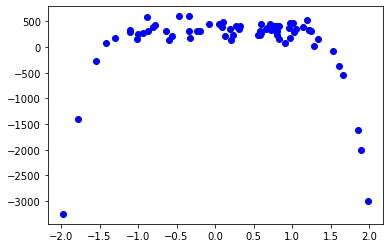

In [4]:
plt.scatter(train['x'], train['y'], color = 'blue');

In [7]:
X_train = pd.DataFrame(train['x'])
Y_train = pd.DataFrame(train['y'])

In [14]:
Y_train.columns =['Y']

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=20, include_bias=False)
train_poly = poly.fit_transform(X_train)
train_polyf = pd.DataFrame(train_poly)
train_polyf.columns =['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']

In [9]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()

# Error Plot

In [17]:
def my_polynomial_regression(poly_degree):
    i = poly_degree
    l=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
    reg_model.fit(train_polyf.loc[:,l[0:i]],Y_train)

    X_test = pd.DataFrame(test['x'])
    Y_test = pd.DataFrame(test['y'])
    Y_test.columns = ['Y']
    test_polyf = poly.fit_transform(X_test)
    test_polyf = pd.DataFrame(test_polyf)

    test_polyf.columns =['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']

    #predictions
    y_hat = reg_model.predict(test_polyf.loc[:,l[0:i]])

    data=pd.DataFrame(y_hat)
    data['1'] =test_polyf.loc[:,['1']]
    data.columns = ['y_hat','X']

    #Train MSE
    Y_train_new = Y_train.copy()
    Y_train_new['y_hat']= pd.DataFrame(reg_model.predict(train_polyf.loc[:,l[0:i]]))
    MSE_train = np.mean(np.square(Y_train_new['Y'] - Y_train_new['y_hat']))
    round(MSE_train,2)

    #Test MSE
    Y_test_new =Y_test.copy()
    Y_test_new['y_hat'] = pd.DataFrame(reg_model.predict(test_polyf.loc[:,l[0:i]]))
    MSE_test = np.mean(np.square(Y_test_new['Y']-Y_test_new['y_hat']))
    round(MSE_test,2)
    
    return poly_degree, round(MSE_train,2),round(MSE_test,2)

In [18]:
my_polynomial_regression(1)

(1, 501321.16, 971145.87)

In [19]:
my_polynomial_regression(2)

(2, 161741.39, 171861.91)

In [20]:
my_polynomial_regression(6)

(6, 12106.79, 12701.2)

In [43]:
returns= []
for i in range(1,15):
    returns.append(my_polynomial_regression(poly_degree=i))
    
output = pd.DataFrame(returns, columns=['Degree', 'RMSE_train', 'RMSE_test'])
output

,Degree,RMSE_train,RMSE_test
0,1,501321.16,971145.87
1,2,161741.39,171861.91
2,3,161490.84,169016.70
3,4,23962.84,42711.28
4,5,23788.62,43064.58
5,6,12106.79,12701.20
6,7,12094.37,12354.53
7,8,12088.68,11996.36
8,9,11908.37,13846.89
9,10,11817.28,13025.72


<Figure size 864x576 with 0 Axes>

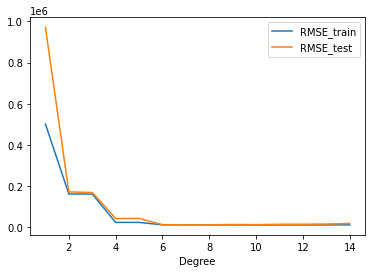

In [44]:
plt.figure(figsize=(12,8))
output.set_index('Degree').plot()
plt.show()

# Fitting 8th Order Polynomial

In [48]:
l=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']

X_test = pd.DataFrame(test['x'])
Y_test = pd.DataFrame(test['y'])
test_polyf = poly.fit_transform(X_test)
test_polyf = pd.DataFrame(test_polyf)

test_polyf.columns =['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']

y_hat = reg_model.fit(train_polyf.loc[:,l[0:8]],Y_train).predict(test_polyf.loc[:,l[0:8]])

In [52]:
error = np.array(Y_test)-y_hat

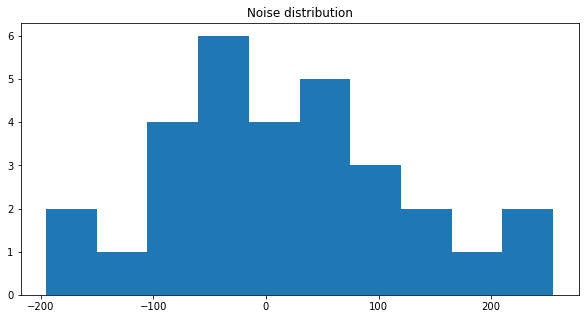

In [53]:
plt.figure(figsize=(10,5))
plt.title("Noise distribution")
plt.hist(error,10);